## **Phân tích dữ liệu của 5 dòng đầu tiên**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load the data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

print("Dataset shape:", train.shape)
print("\nFirst few rows:")
train.head()

Dataset shape: (891, 12)

First few rows:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# Basic information about the dataset
print("Dataset Info:")
print(train.info())
print("\nDataset Description:")
print(train.describe())
print("\nMissing values:")
print(train.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Dataset Description:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523

## **Xác định tính chất**

In [3]:
# Check for duplicates
print("Duplicate rows:", train.duplicated().sum())

# Check unique values in categorical columns
categorical_cols = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
for col in categorical_cols:
    print(f"\n{col} unique values:")
    print(train[col].value_counts())

Duplicate rows: 0

Pclass unique values:
Pclass
3    491
1    216
2    184
Name: count, dtype: int64

Sex unique values:
Sex
male      577
female    314
Name: count, dtype: int64

SibSp unique values:
SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

Parch unique values:
Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

Embarked unique values:
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


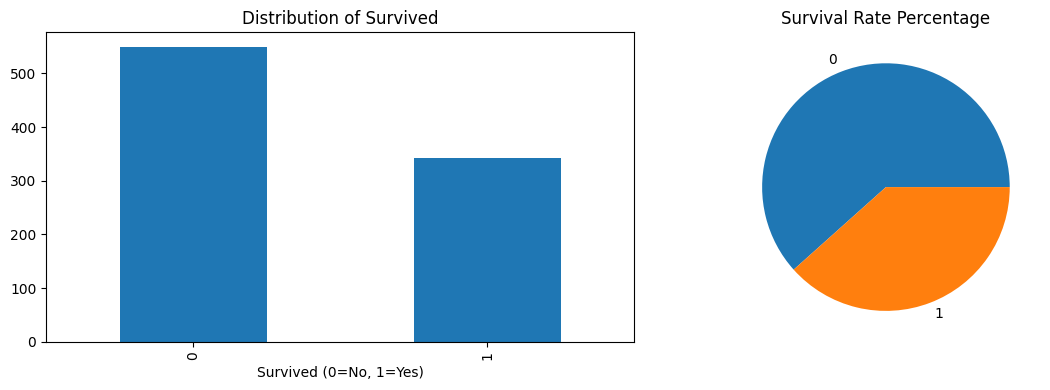

Overall survival rate: 38.38%


In [4]:
# Analyze the target variable (Survived)
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
train['Survived'].value_counts().plot(kind='bar')
plt.title('Distribution of Survived')
plt.xlabel('Survived (0=No, 1=Yes)')

plt.subplot(1, 2, 2)
(train['Survived'].value_counts() / len(train) * 100).plot(kind='pie')
plt.title('Survival Rate Percentage')
plt.ylabel('')

plt.tight_layout()
plt.show()

print(f"Overall survival rate: {train['Survived'].mean():.2%}")

## **Phân tích đơn biến**

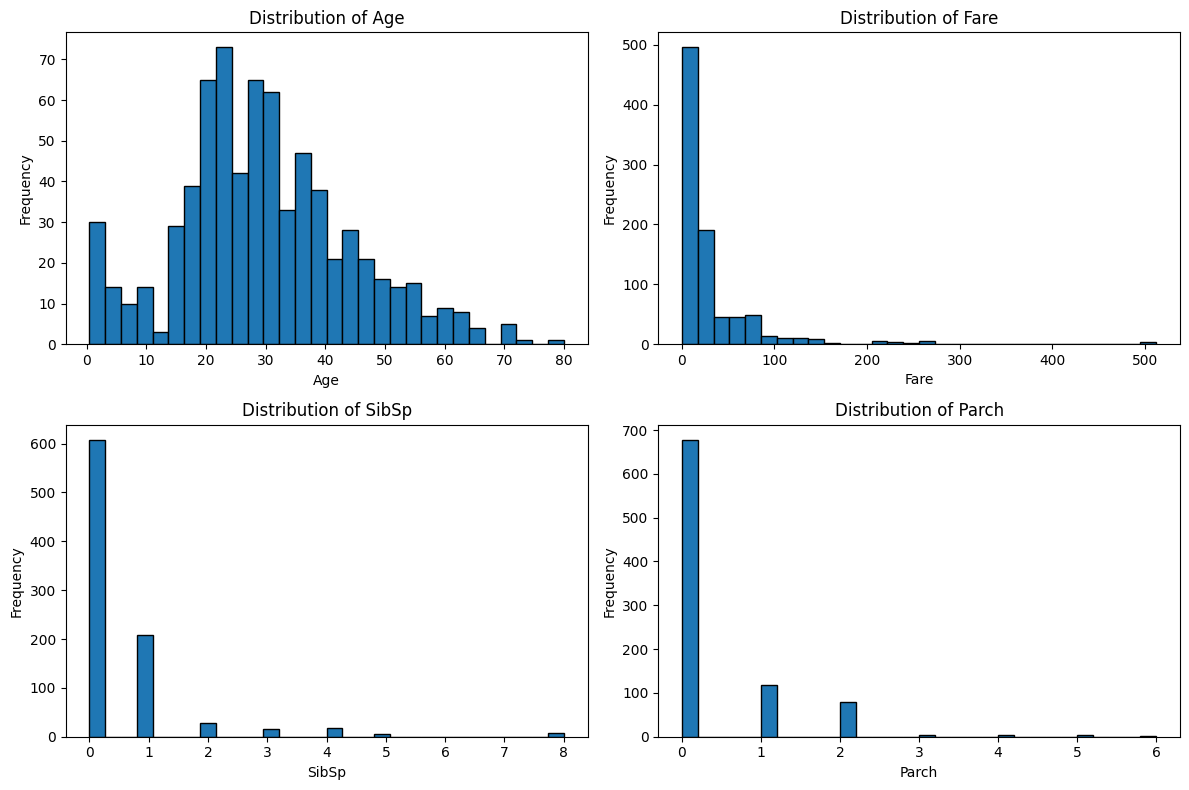

In [5]:
# Distribution of numerical features
numerical_cols = ['Age', 'Fare', 'SibSp', 'Parch']
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.ravel()

for i, col in enumerate(numerical_cols):
    axes[i].hist(train[col].dropna(), bins=30, edgecolor='black')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## **Phân tích đa biến**

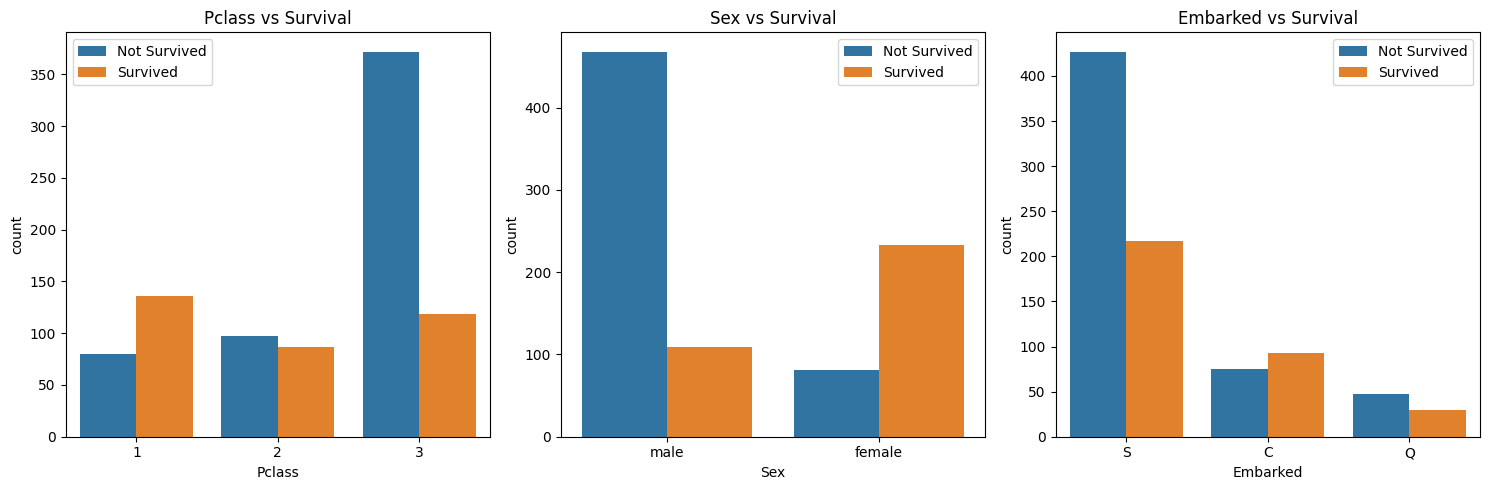

In [6]:
# Analyze categorical variables and their relationship with survival
categorical_cols = ['Pclass', 'Sex', 'Embarked']

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, col in enumerate(categorical_cols):
    sns.countplot(data=train, x=col, hue='Survived', ax=axes[i])
    axes[i].set_title(f'{col} vs Survival')
    axes[i].legend(['Not Survived', 'Survived'])

plt.tight_layout()
plt.show()

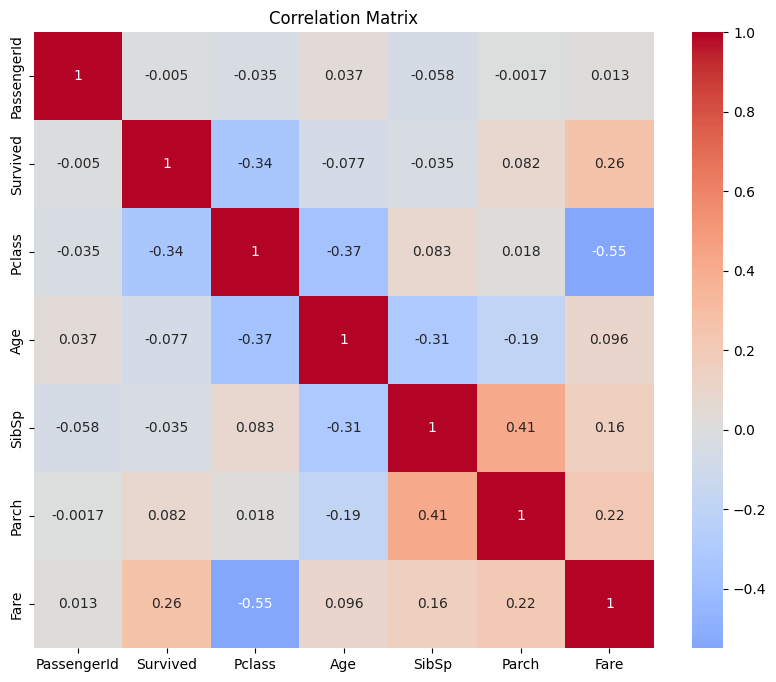

In [7]:
# Correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = train.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

## **Phân tích tuổi tác**

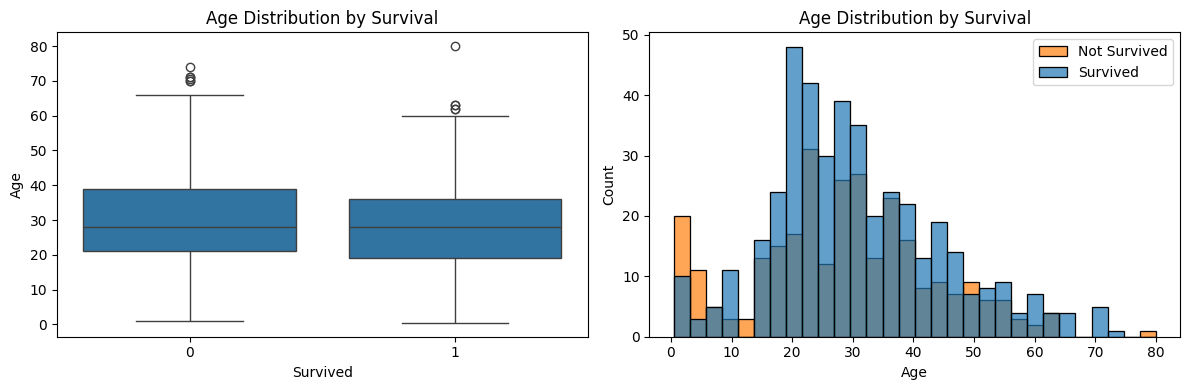

In [8]:
# Age distribution by survival
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.boxplot(data=train, x='Survived', y='Age')
plt.title('Age Distribution by Survival')

plt.subplot(1, 2, 2)
sns.histplot(data=train, x='Age', hue='Survived', alpha=0.7, bins=30)
plt.title('Age Distribution by Survival')
plt.legend(['Not Survived', 'Survived'])

plt.tight_layout()
plt.show()

## **Phân tích giá vé và so sánh khả năng khả năng sống sót giữa độ tuổi và giá vé**

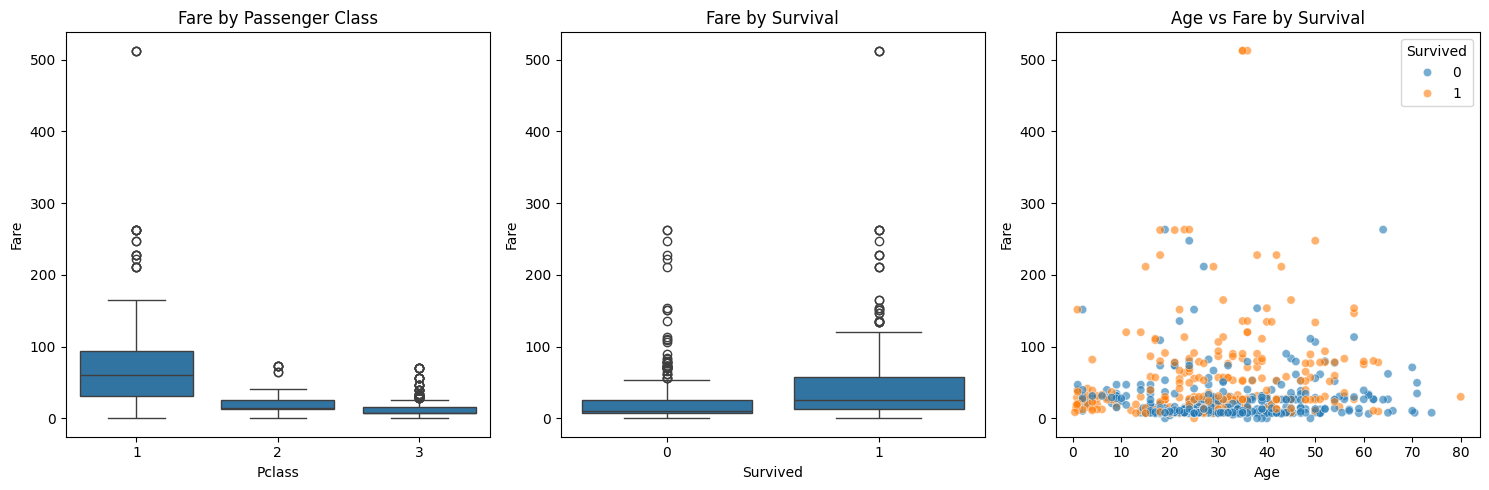

In [9]:
# Fare analysis
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=train, x='Pclass', y='Fare')
plt.title('Fare by Passenger Class')

plt.subplot(1, 3, 2)
sns.boxplot(data=train, x='Survived', y='Fare')
plt.title('Fare by Survival')

plt.subplot(1, 3, 3)
sns.scatterplot(data=train, x='Age', y='Fare', hue='Survived', alpha=0.6)
plt.title('Age vs Fare by Survival')

plt.tight_layout()
plt.show()

## **Thông tin chi tiết về Kỹ thuật Tính năng**

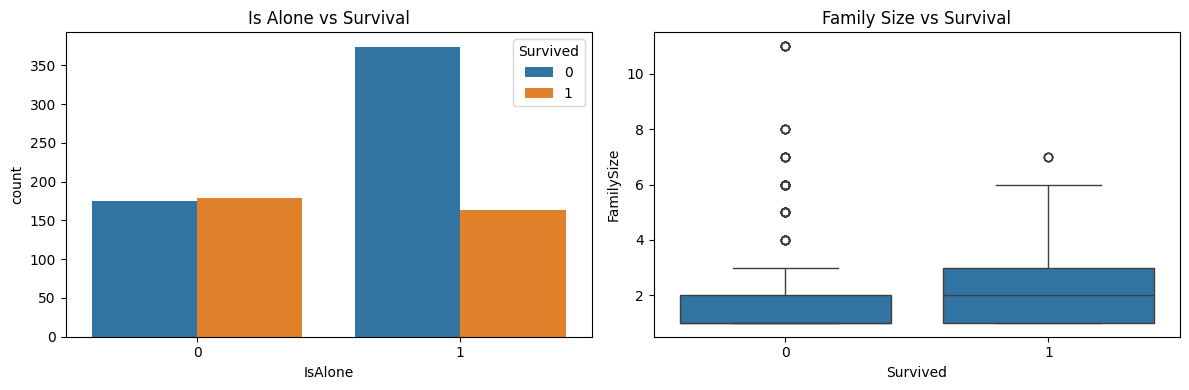

In [10]:
# Create new features and analyze
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
train['IsAlone'] = (train['FamilySize'] == 1).astype(int)

# Analyze new features
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.countplot(data=train, x='IsAlone', hue='Survived')
plt.title('Is Alone vs Survival')

plt.subplot(1, 2, 2)
sns.boxplot(data=train, x='Survived', y='FamilySize')
plt.title('Family Size vs Survival')

plt.tight_layout()
plt.show()

## **Xác định giá trị thiếu, mẫu bất thường**

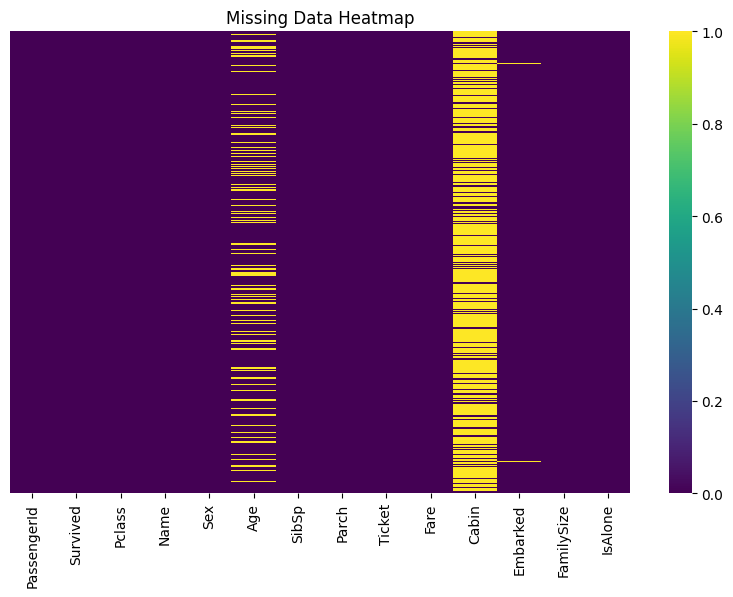

Missing Data Percentage:
Cabin       77.104377
Age         19.865320
Embarked     0.224467
dtype: float64


In [11]:
# Visualize missing data
plt.figure(figsize=(10, 6))
sns.heatmap(train.isnull(), yticklabels=False, cbar=True, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

# Percentage of missing data
missing_data = (train.isnull().sum() / len(train)) * 100
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)
print("Missing Data Percentage:")
print(missing_data)

## **Giá trị ngoại lệ**

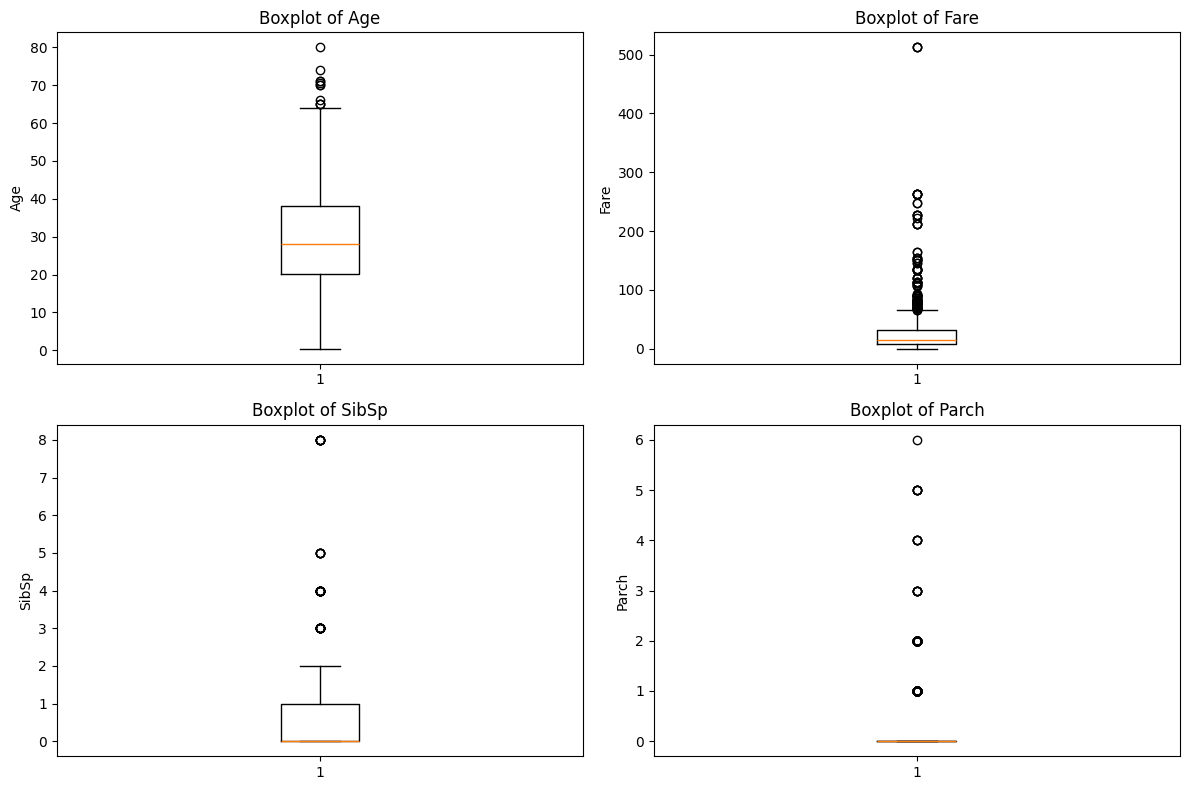

In [12]:
# Box plots to detect outliers
numerical_cols = ['Age', 'Fare', 'SibSp', 'Parch']
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.ravel()

for i, col in enumerate(numerical_cols):
    axes[i].boxplot(train[col].dropna())
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

## **Tổng kết**

In [13]:
# Group by survival and calculate statistics
survival_stats = train.groupby('Survived').agg({
    'Age': ['mean', 'median', 'std'],
    'Fare': ['mean', 'median', 'std'],
    'SibSp': ['mean', 'median', 'std'],
    'Parch': ['mean', 'median', 'std']
}).round(2)

print("Summary Statistics by Survival:")
print(survival_stats)

Summary Statistics by Survival:
            Age                 Fare               SibSp              Parch  \
           mean median    std   mean median    std  mean median   std  mean   
Survived                                                                      
0         30.63   28.0  14.17  22.12   10.5  31.39  0.55    0.0  1.29  0.33   
1         28.34   28.0  14.95  48.40   26.0  66.60  0.47    0.0  0.71  0.46   

                       
         median   std  
Survived               
0           0.0  0.82  
1           0.0  0.77  
